Noah Kasmanoff

nsk367@nyu.edu

Notebook workspace for questions in homework 1, will convert answers into py files and move to src once confident in their results. 

1) Differentiate the functions cos(x) and exp(x) at x = 0.1, 10 using single precision
    forward-, central- and extrapolated-difference algorithms.

    a) Write a code that implements these three methods.
    
    b) Make a log-log plot of the relative error ε vs step size h and check whether
    the scaling and the number of significant digits obtained agrees with
    simple estimates.
    
    c) Truncation and roundoff error manifest themselves in different regimes in
    these plots. Clearly identify these regimes.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')


In [2]:
def derivs(f,x,h,method = 'all'):
    """
    Using forward differencing, central differencing, or richardson extraplation differencing,
    calulate the derivative of a given function f. 
    
    
    We seek to model the error behavior of these various methods for analytically solvable functions like cosine and
    exponentials, and from there interpret the manifestation of these errors over different regimes. 
    

    Parameters
    ----------
    
    f : function
        function of interest, i.e np.cos, np.exp, etc. 
    x : float
        x value of the function to compute the derivative at. 
    h : float
        Step size for the derivative calulcation, tends towards 0. 
    method : str
        desired method of differentiation. Default setting is all, and will compute all three derivative calculations at one. 
        
    Returns
    -------
    
    f or c + e + deriv : float
        Derivative of function f at position x given step size h, for the provided method. 
        Note if method is set to all, will return a list of all three in ascending order of precision. 
        f = forward, c = central, e = extrapolation
        
    """
    #make sure to convert all values to float 32
    fderiv = (f(x + h) - f(x)) / h
    cderiv = (f(x + h ) - f(x - h)) / (2*h)
    ederiv = (-f(x + 2*h) + 8 * f(x + h) - 8 * f(x - h) + f(x - 2*h) ) / (12*h)

    if method == 'forward':
        return fderiv
    if method == 'central':
        return cderiv
    if method == 'extrapolation':
        return ederiv
    if method == 'all':
        return [fderiv,cderiv,ederiv]


In [3]:
def derivs(f,x,h,method = 'all'):
    """
    Using forward differencing, central differencing, or richardson extraplation differencing,
    calulate the derivative of a given function f. 
    
    
    We seek to model the error behavior of these various methods for analytically solvable functions like cosine and
    exponentials, and from there interpret the manifestation of these errors over different regimes. 
    

    Parameters
    ----------
    
    f : function
        function of interest, i.e np.cos, np.exp, etc. 
    x : float
        x value of the function to compute the derivative at. 
    h : float
        Step size for the derivative calulcation, tends towards 0. 
    method : str
        desired method of differentiation. Default setting is all, and will compute all three derivative calculations at one. 
        
    Returns
    -------
    
    f or c + e + deriv : float
        Derivative of function f at position x given step size h, for the provided method. 
        Note if method is set to all, will return a list of all three in ascending order of precision. 
        f = forward, c = central, e = extrapolation
        
    """
    #make sure to convert all values to float 32
    fderiv = (np.float32(f(np.float32(x) + np.float32(h))) - np.float32(f(np.float32(x)))) / np.float32(h)
    cderiv = np.float32((np.float32(f(np.float32(x) + np.float32(h) )) - np.float32(f(np.float32(x) - np.float32(h)))) / (np.float32(2)*np.float32(h)))
    ederiv = ( np.float32(-f(np.float32(x) + np.float32(2)*np.float32(h))) +
              np.float32(8) * np.float32(f(np.float32(x) + np.float32(h))) - np.float32(8) * 
    np.float32(f(np.float32(x) - np.float32(h))) + np.float32(f(np.float32(x) - np.float32(2)*np.float32(h))) )  /(np.float32(12)*np.float32(h))

    if method == 'forward': #   expected error ~h^1
        return fderiv
    if method == 'central': #   expected error ~h^2
        return cderiv
    if method == 'extrapolation': #   expected error ~h^4
        return ederiv
    if method == 'all':
        return [fderiv,cderiv,ederiv]


i+1:  1
i+1:  2
i+1:  3
i+1:  4


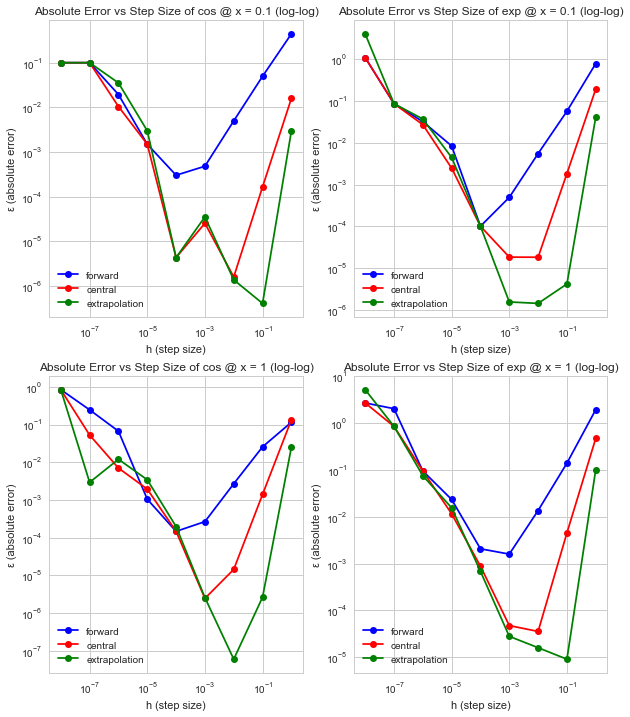

In [4]:
from numpy import cos,exp
values = [.1,1] #+ 2*np.pi Is the error the same? 
functions = [cos,exp]

hvals = .1**np.arange(0,9,dtype='single')
plt.figure(figsize=(10,12))
i = 1
for _, value in enumerate(values):
    for _, function in enumerate(functions):
        func_str = str(function).split(' ')[1].split("'")[1]
        calculated_derivative = []

        for h in hvals:
            calculated_derivative.append(derivs(function,value,h,method='all'))

        if function == cos:
            true_deriv = -np.sin(value)
        if function == exp:
            true_deriv = exp(value)
        true_deriv = np.float32(true_deriv)
        error = abs(calculated_derivative - true_deriv) #absolute error
        print("i+1: ", i)
        plt.subplot(2, 2, i)
        
        plt.plot(hvals,error[:,0],'b-o',label = 'forward')
        plt.plot(hvals,error[:,1],'r-o',label = 'central')
        plt.plot(hvals,error[:,2],'g-o',label = 'extrapolation')
        #plt.xlim([max(hvals),min(hvals)])
        plt.legend()
        plt.title("Absolute Error vs Step Size of "+ func_str + " @ x = " + str(value)  +" (log-log)")#,fontsize = 10)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('h (step size)')
        plt.ylabel('ε (absolute error)')
        i += 1


In these various plots, we see the transition between roundoff and truncation error begin to manifest itself around 10e-3. Initial when step sizes for differentiation are large, the error in the derivative calculation is quite large, and steadily decreases in accordance to the leading order error term for each method respectively. From there we reach a point where the step size is below the threshold of single precision, and leads to an increase in error yet agaan until reaching approximately the same error value as with larger step sizes, implying the numerical derivative is practically experiencing cancellation, and fails to capture the true value of the derivative. 


Depending on the function and value it is derived at, we observe slightly different effects of how the truncation error behaves near the limit at which single precision is maximized. 


In particular, we observe the largest error values for the exponential function at 1, where the difference between fx and fx+h in general will be very large in comparision to the other tasks as a result of the exponential behavior of the function ni question. 

Please note how these axes are scaled and ascend!

It is symlog, and also, https://docs.python.org/3/tutorial/floatingpoint.html 

17 is the max number of sig figs! 

In [ ]:
exp(1)

b) Simple estimates imply that error in forward scales with step size to the _. 

For central differences, the implied error scales with ,,


and for extrapolated difference, the implied error scales as _. 

Based on these graphs, we seem to see this error to be in agreement on an order of magnitude basis. 


c) Truncation error is manifested in smaller step sizes, 

For larger derivatives, this truncation error is less noticeable since the first few digits are found. This is especially apparent for cos 1 and exp 1, in comparison to their .1 counterparts. 

Consider the integral,

I = integral of exp(-t)dt from 0 to 1 

And compare the relative error, ε, for the midpoint rule, trapezoid rule, and
Simpson’s rule for single precision.


a) Write code that implements each method.


b) Make a log-log plot of e as a function of number of bins N. (Since this is a log-log plot, choose values that scale in a reasonable fashion). Make N large enough such that you see the effects of roundoff error.


c) Explain what you see in the plot.

Text(0, 0.5, 'ε (relative error)')

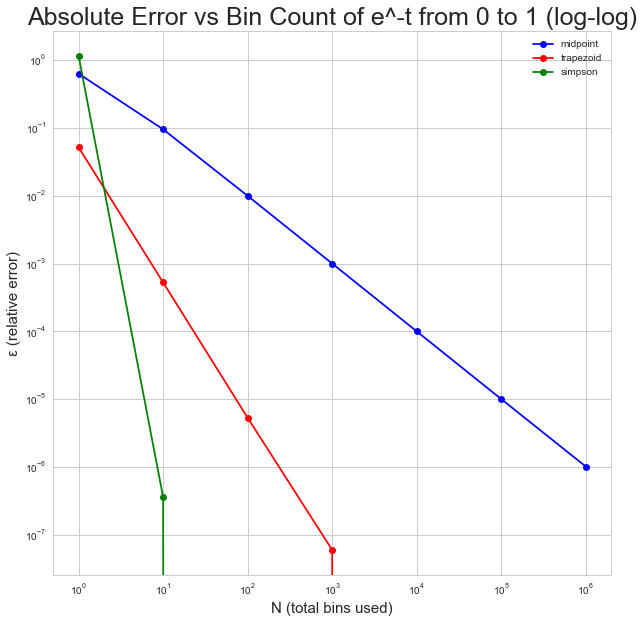

In [5]:

eminust = lambda t: exp(-t) #defined function for this problem 
def integrate(f,a,b,N,method = 'all'):
    """
    Integrates a function f from a to b, given N estimation bins, with the 
    provided method. 
    
    
    Parameters
    ----------
    
    f : function
        Function to integrate. 
    a : float
        Starting point of integral.
    b : float
        End point of integral. 
    N : int
        Number of bins used to estimate the function's area under curve. 
    method : str
        What computational method to use, be it midpoint, trapezoid, simpson'. 
        
    Returns
    -------
    
    
    I_method : float
        Integral sum with that method's solution
    """
    #trapezoid method here. 
    h = (b - a) / (N)
    
    midpoint_sum = sum([h*f((k+.5)*h) for k in range(1,N)])  #   expected error ~h^1
    I_midpoint = midpoint_sum
            
    trap_sum = sum([f(a + k*h) for k in range(1,N)])
    I_trapezoid = h*(f(a) / 2 + f(b) / 2 + trap_sum)  #   expected error ~h^2
              
        
    s = f(a) + f(b) + 4*f(b-h)
    for k in range(1,N//2):
        s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    I_simpson = (h/3)*s  #   expected error ~h^4
        
    if method == 'midpoint':
        return np.float32(I_midpoint)
    if method == 'trapezoid':
        return np.float32(I_trapezoid)
    #still need to work on trapezoid rule .
    if method == 'simpson':
        return I_simpson
    
    if method == 'all':
        return [np.float32(I_midpoint),np.float32(I_trapezoid),np.float32(I_simpson)]
    


f = eminust
true_integral = np.float32(-eminust(1) +eminust(0)) #this integral doesn't have an exact solution? 
a = 0
b = 1

Ns = 10**np.arange(0,7)
calculated_integral = []

for N in Ns:
    
    calculated_integral.append(integrate(f=eminust,a=a,b=b,N=N,method='all'))
error = abs(np.array(calculated_integral)  - true_integral)
plt.figure(figsize=(10,10))

#%%
plt.plot(Ns,error[:,0],'bo-',label = 'midpoint')
plt.plot(Ns,error[:,1],'ro-',label = 'trapezoid')
plt.plot(Ns,error[:,2],'go-',label = 'simpson')
#plt.xlim([min(Ns),max(Ns)])
plt.legend()
plt.title("Absolute Error vs Bin Count of e^-t" + " from 0 to 1"  +" (log-log)",fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (total bins used)',fontsize=15)
plt.ylabel('ε (relative error)',fontsize = 15)


Text(0, 0.5, 'ε (relative error)')

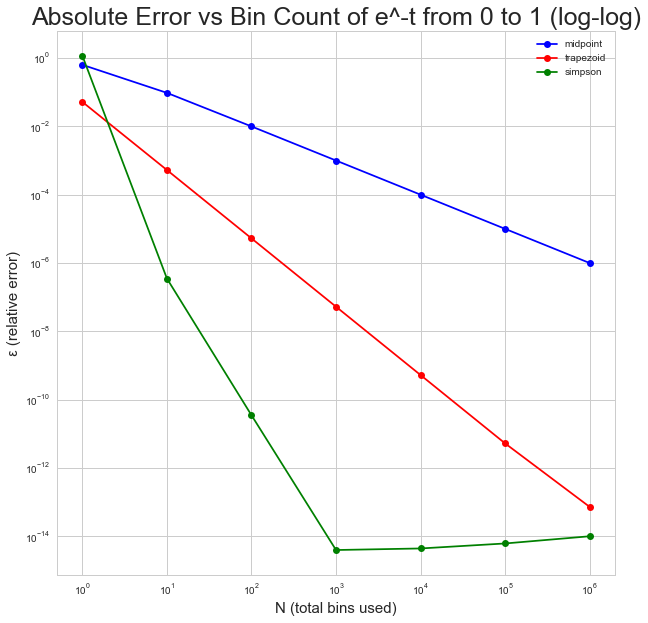

In [6]:
eminust = lambda t: exp(-t) #defined function for this problem 
def integrate(f,a,b,N,method = 'all'):
    """
    Integrates a function f from a to b, given N estimation bins, with the 
    provided method. 
    
    
    Parameters
    ----------
    
    f : function
        Function to integrate. 
    a : float
        Starting point of integral.
    b : float
        End point of integral. 
    N : int
        Number of bins used to estimate the function's area under curve. 
    method : str
        What computational method to use, be it midpoint, trapezoid, simpson'. 
        
    Returns
    -------
    
    
    I_method : float
        Integral sum with that method's solution
    """
    #trapezoid method here. 
    h = (b - a) / (N)
    
    midpoint_sum = sum([h*f((k+.5)*h) for k in range(1,N)])  #   expected error ~h^1
    I_midpoint = midpoint_sum
            
    trap_sum = sum([f(a + k*h) for k in range(1,N)])
    I_trapezoid = h*(f(a) / 2 + f(b) / 2 + trap_sum)  #   expected error ~h^2
              
        
    s = f(a) + f(b) + 4*f(b-h)
    for k in range(1,N//2):
        s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    I_simpson = (h/3)*s  #   expected error ~h^4
        
    if method == 'midpoint':
        return I_midpoint
    if method == 'trapezoid':
        return I_trapezoid
    #still need to work on trapezoid rule .
    if method == 'simpson':
        return I_simpson
    
    if method == 'all':
        return [I_midpoint,I_trapezoid,I_simpson]
    


f = eminust
true_integral = -eminust(1) +eminust(0) #this integral doesn't have an exact solution? 
a = 0
b = 1

Ns = 10**np.arange(0,7)
calculated_integral = []

for N in Ns:
    
    calculated_integral.append(integrate(f=eminust,a=a,b=b,N=N,method='all'))
error = abs(np.array(calculated_integral)  - true_integral)
plt.figure(figsize=(10,10))

#%%
plt.plot(Ns,error[:,0],'bo-',label = 'midpoint')
plt.plot(Ns,error[:,1],'ro-',label = 'trapezoid')
plt.plot(Ns,error[:,2],'go-',label = 'simpson')
#plt.xlim([min(Ns),max(Ns)])
plt.legend()
plt.title("Absolute Error vs Bin Count of e^-t" + " from 0 to 1"  +" (log-log)",fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (total bins used)',fontsize=15)
plt.ylabel('ε (relative error)',fontsize = 15)

In [ ]:
error

In this plot, we observe that Simpson's rule performs far better than the other two techniques on bin size, but initially begins out worse. This can be explained by the fact that Simpson's rule depends on 3 known values to evaluate, and when N is large, these points will be farther apart and thus yield a less representative approximation of the function. However, this is quickly turned around after more bins are added. 


Furthermore, we observe that based on approximations of how these numerical integration methods should perform in the truncation regime, midpoint method should have an order term of h^2, trapezoid h^3, and Simpsons h^4. This appears to hold true. 

Furthermore, when working in single precision (float32), we observe that roundoff error begins to play a role in error evaluations once approximately 1ex bins are used. 




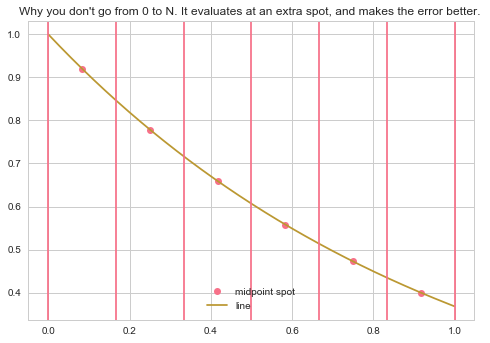

In [7]:
#.001 * k for 
b = 1 
a = 0
N = 6
h = (b-a)/N
ks = [h*(k+.5) for k in range(0,N)]
spots = [eminust((h*(k+.5))) for k in range(0,N)]
plt.plot(ks,spots,'o',label = 'midpoint spot')

plt.plot(np.arange(0,1,.001),eminust(np.arange(0,1,.001)),label = 'line')
plt.legend()
plt.title("Why you don't go from 0 to N. It evaluates at an extra spot, and makes the error better. ")

[plt.axvline(k*h) for k in range(0,N+1)] #0 to n+1 bins

#[plt.axhline(eminust((h*(k+.5)))) for k in range(0,N)]

# Question 3

4ths is the transfer function, supresses fluctuations...

Log k is -4 to 3


100 lines in file, each is 3 - 4 / 1000 is delta log k 


xk = pow(10, k / 100 ) 

In [11]:
Pk = pd.read_csv('../dat/lcdm_z0.matter_pk',delimiter=' ',names=['k','P(k)','idk1',
                                                                'idk2'],header=None)

Pk = Pk[Pk.columns[0:2]]
Pk = pd.concat([Pk,pd.DataFrame(columns=Pk.columns,data=np.array([0,0]).reshape(1,2)),
                ]).sort_values('k').reset_index(drop=True)

For now, let's assume that's the correct ordering and columns. Pk[0] -> k values, Pk[1] -> P values. 

 1e4 / 1e6

Units??


0th order Bessel function used? 




In [12]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


def interp_Pk(Pk,col,k):
    """
    Interpolates the Pk function's value at a point k
    by locating the nearest two points above and below it, and interpolates to that point's approximate value. 
    
    Parameters
    ----------
    
    
    Pk : dataframe
        Provided dataset on density.
        
    k : float
        Value to interpolate to
        
    Returns 
    -------
    
    fk : float
        Value of interpolated data point. 
        
    """
    
    #for k in ks:  make this f vectorizable? 
    from numpy import interp
    upperbound = find_nearest(Pk['k'].loc[Pk['k'] > k],k)

    lowerbound = find_nearest(Pk['k'].loc[Pk['k'] < k],k)
  #  print("Value: ", k)
  #  print("Found upper: ", upperbound)
  #  print("Found lower: ", lowerbound)
    return interp(k, [lowerbound,upperbound], [Pk.loc[Pk['k'] == lowerbound][col].values[0],
                                               Pk.loc[Pk['k'] == upperbound][col].values[0]])


interp_vals = []
points = 10**np.linspace(-3.9999,2.999,1000)

for i in points:
    interp_vals.append(interp_Pk(Pk,'P(k)',i))

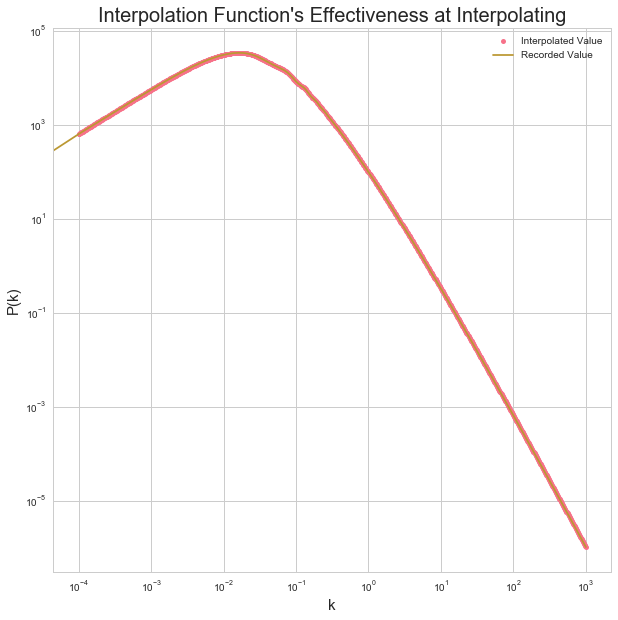

In [13]:
plt.figure(figsize=(10,10))
plt.plot(  points,interp_vals,'.',markersize=10,label = 'Interpolated Value')
plt.plot(Pk['k'],Pk['P(k)'],'-', label = 'Recorded Value')
plt.xscale('log')
plt.yscale('log')
plt.title("Interpolation Function's Effectiveness at Interpolating",fontsize=20)
plt.xlabel('k',fontsize=15)
plt.ylabel('P(k)',fontsize=15)
plt.legend()

In [39]:
#Pk.fillna(0,inplace=True)
#going to want to repeat this for each r! 
from numpy import trapz


integrand_cont = lambda k,r: k*k*np.sin((k*r)) / (k*r) #the continuous and calculatable quantities in the integrand. 

In [46]:

    
k_arr = np.arange(1,int(1e2)//2 + 1,1)

In [47]:
def simpsons_array(k):
    return 4*interp_Pk(Pk=Pk, k = a+(2*k-1)*h,col='Integrand') + 2*interp_Pk(Pk=Pk,k = a+(2*k*h),col='Integrand') 

In [57]:
def simps(a,b,Pk,N):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = interp_Pk(Pk=Pk,k = x, col = 'Integrand')
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [55]:
def simpsons_array(k):
    return 4*interp_Pk(Pk=Pk, k = a+(2*k-1)*h,col='Integrand') + 2*interp_Pk(Pk=Pk,k = a+(2*k*h),col='Integrand') 


def integrate_3(a,b,Pk,N):
    """
    
    Integrate the integrand shown in question 3, using the simpson method. 
    
    Not even using this right now lol
    
    """
    from numpy import pi
    h = (b - a) / N
 #   print("bin width: ", h)
    
    s = interp_Pk(Pk=Pk,k=a,col='Integrand') + interp_Pk(Pk = Pk,k=b,col='Integrand') + 4*interp_Pk(Pk=Pk,k = (b-h),col='Integrand')
   

    for k in range(1,N//2):
        #list of k from 1 to N//2:
        
        s += 4*interp_Pk(Pk=Pk, k = a+(2*k-1)*h,col='Integrand') + 2*interp_Pk(Pk=Pk,k = a+(2*k*h),col='Integrand') 
    #array s
    I_simpson = s * (h/(3*2*np.pi*np.pi))
    
    
        
    return I_simpson

In [ ]:
corrs = []
rs = np.linspace(0,120,32)
for r in rs:
    print("Now testing r = ", r)
    Pk.sort_values('k',inplace=True)
    Pk['Integrand Known Quantity']  = Pk['k'].apply(lambda k: integrand_cont(k=k,r=r))
    #multiply this function with the corresponding Pk value at each point. 
    Pk.fillna(0,inplace=True)
  #  Pk['Integrand'] = Pk['integrand_p1']* Pk['P(k)']
    Pk['Integrand'] = (Pk.apply(lambda z: z['Integrand Known Quantity'] * z['P(k)'],axis = 1))
    corr = (integrate_3(10**-3.99,10**2.999,Pk,N=int(1e5))) / (2 * np.pi * np.pi) 
    corrs.append(corr)

  #  corrs.append((r*r)*trapz(Pk['Integrand']) / (2 * np.pi * np.pi))
 #change the order of interpolation and then add known values! Maybe error compounds because of this.    
    print(" corr = ", corr)

    
    

Now testing r =  0.0
 corr =  0.0
Now testing r =  3.870967741935484
 corr =  0.10373836834571522
Now testing r =  7.741935483870968
 corr =  0.04084514548961464
Now testing r =  11.612903225806452
 corr =  0.021280603511358916
Now testing r =  15.483870967741936
 corr =  0.012035054177948201
Now testing r =  19.35483870967742
 corr =  0.007413383835383053
Now testing r =  23.225806451612904
 corr =  0.004814923717381575
Now testing r =  27.096774193548388
 corr =  0.004173462599098414
Now testing r =  30.967741935483872
 corr =  0.002291469371084642
Now testing r =  34.83870967741936
 corr =  0.0021641165834610063
Now testing r =  38.70967741935484
 corr =  0.000786506527388988
Now testing r =  42.58064516129032
 corr =  0.0008231938563894091
Now testing r =  46.45161290322581
 corr =  0.00043627874712009584
Now testing r =  50.322580645161295
 corr =  0.0007456663245956249
Now testing r =  54.193548387096776
 corr =  0.0007383955369462026
Now testing r =  58.064516129032256
 corr =  

Now testing r =  0.0
 corr =  0.0
Now testing r =  3.870967741935484
 corr =  0.10373836834571522
Now testing r =  7.741935483870968
 corr =  0.04084514548961464
Now testing r =  11.612903225806452
 corr =  0.021280603511358916
Now testing r =  15.483870967741936
 corr =  0.012035054177948201
Now testing r =  19.35483870967742
 corr =  0.007413383835383053
Now testing r =  23.225806451612904
 corr =  0.004814923717381575
Now testing r =  27.096774193548388
 corr =  0.004173462599098414
Now testing r =  30.967741935483872
 corr =  0.002291469371084642
Now testing r =  34.83870967741936
 corr =  0.0021641165834610063
Now testing r =  38.70967741935484
 corr =  0.000786506527388988
Now testing r =  42.58064516129032
 corr =  0.0008231938563894091
Now testing r =  46.45161290322581
 corr =  0.00043627874712009584
Now testing r =  50.322580645161295
 corr =  0.0007456663245956249
Now testing r =  54.193548387096776
 corr =  0.0007383955369462026
Now testing r =  58.064516129032256
 corr =  0.000616589178982797
Now testing r =  61.935483870967744
 corr =  0.0004349854782671997
Now testing r =  65.80645161290323
 corr =  1.020158617690166e-05
Now testing r =  69.67741935483872
 corr =  0.0005975197744712443
Now testing r =  73.54838709677419
 corr =  -7.926902071232816e-05
Now testing r =  77.41935483870968
 corr =  5.912660494435173e-05
Now testing r =  81.29032258064517
 corr =  -0.00012685714495139601
Now testing r =  85.16129032258064
 corr =  -0.0001524056730283286
Now testing r =  89.03225806451613
 corr =  -3.274079014049214e-05
Now testing r =  92.90322580645162
 corr =  -0.00029618041918586104
Now testing r =  96.7741935483871
 corr =  -6.346524954882329e-05
Now testing r =  100.64516129032259
 corr =  0.0005869429459657075
Now testing r =  104.51612903225806
 corr =  5.6869879938307935e-05
Now testing r =  108.38709677419355
 corr =  0.00017600185821137917
Now testing r =  112.25806451612904
 corr =  -0.00018150729182178963
Now testing r =  116.12903225806451
 corr =  0.00012121044620852246
Now testing r =  120.0
 corr =  2.1975736276196616e-05

In [ ]:
rs[0:(len(corrs))]

In [ ]:
plt.plot(rs[0:(len(corrs))],corrs,'o--')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('Correlation Function ξ (r)',fontsize = 15)
plt.title("Correlation Function vs. Separation ",fontsize = 20)

In [74]:
rs

array([ 50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,
        72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,
        95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. , 112.5, 115. ,
       117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
       140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5, 160. ,
       162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5, 180. , 182.5,
       185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ])

Text(0.5, 1.0, 'r^2 * Correlation Function vs. Separation ')

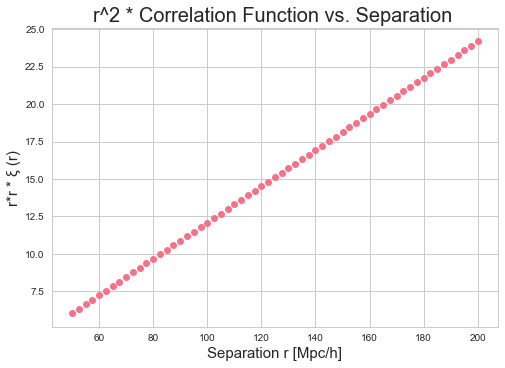

In [75]:
plt.plot(rs,np.power(rs,2)*corrs,'o')
plt.xlabel("Separation r [Mpc/h]",fontsize = 15)
plt.ylabel('r*r * ξ (r)',fontsize = 15)
plt.title("r^2 * Correlation Function vs. Separation ",fontsize = 20)

In [62]:
corrs

[]

In [ ]:
plt.plot(rs,corrs)


Now in essence I have evaluated the value of the integrand at all known points due to the dataset available to me, and likewise created a function which interpolated between the two closest points of a desired value to evaluate at, which in turn will be plugged into some integration tool!

Integrate the function above!

The bao bump is manifested in two different ways, for no r^2 its early on, but with r^2 its two things later on. Clearly something is wrong!

In [ ]:
corrs